# Homework 3. Carlos Alvarado

### Initial Settings

In [1]:
import sys
sys.path.append('./source')

from step1_read_data import read_data
from step2_explore import describe_column, tabular, histogram, print_explore
from step3_preprocess import fill_miss, convert_column_type
from step4_create_features import discretize, make_dummies
from step5_classifiers import MyClassifier
from step6_evaluate import evaluate

%matplotlib inline

### Config Variables

In [ ]:
FILENAME = 'data/credit-data.csv'

### Step 1. Read Data

In [2]:
# Read Data into Pandas object
data = read_data(FILENAME)

### Step 2. Explore data

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object
-----------------------------------------
Describing variable: PersonID
count    150000.000000
mean      75000.500000
std       43301.414527
min           1.000000
25%       37500.750000
50%       75000.500000
75%      112500.250000
max      150000.000000
Name: PersonID, dtype: float64

Unique values: 150000

Missing values: 0
---------------------------------

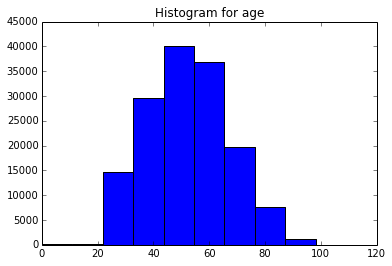

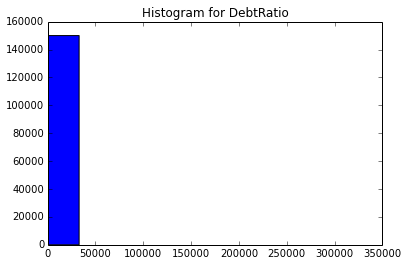

In [3]:
print_explore(data)

### Step 3. Pre-process data

In [ ]:
# Convert SeriousDlqin2yrs to booleans (this is Y, the outcome variable)
convert_column_type(data, 'SeriousDlqin2yrs', 'bool', value_if_true = 1)

#Convert NumberOfDependents to integers
convert_column_type(data, 'NumberOfDependents', 'int')

In [ ]:
# Clean some variables (to remove possible outliers)

# Debt Ratio over 10000% is very unlikely

data['DebtRatio'].loc[data['DebtRatio'] > 10000] = None

# Note to myself: create winsorize function for next assignment

In [ ]:
#Variables with missing values: MonthlyIncome, NumberOfDependents
data = fill_miss(data, 'MonthlyIncome', method='mean')
data = fill_miss(data, 'NumberOfDependents', method='median')
data = fill_miss(data, 'DebtRatio', method='median')

# Note to me: add more methods in the future: nearest neighbor or other classification method

### Step 4. Create Features

In [ ]:
discretize(data, 'MonthlyIncome', nbins=5, cut_type='quantile')
discretize(data, 'DebtRatio', nbins=5, cut_type='logspace')

In [ ]:
make_dummies(data, 'NumberOfDependents')
make_dummies(data, 'DebtRatio_cat')

In [ ]:
make_dummies(data, 'MonthlyIncome_cat')

In [ ]:
data.columns

### Step 5. Classify

In [ ]:
# The task here is to predict who will  experience financial 
# distress in the next two years. The outcome variable (label) 
# in the data is SeriousDlqin2yrs. We have access to other information 
# about this person (as described in the data dictionary). Your assignment 
#is to take this data and build a machine learning pipeline that 
#trains *one* machine learning model on the data. 
from sklearn.model_selection import train_test_split

features = ['NumberOfDependents', 'age', 'MonthlyIncome_cat_0',
       'MonthlyIncome_cat_1', 'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
       'MonthlyIncome_cat_4', 'DebtRatio_cat_0',
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5']

model_list = ['logistic']

X = data.loc[:, features ]

Y = data['SeriousDlqin2yrs']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=None)

for model_name in model_list:
    model = MyClassifier(X_train, Y_train, model_name)

    model.model.score(X_test, Y_test)

In [ ]:
print(model.model.coef_)

### Step 6. Evaluate

In [ ]:
model.model.score(X_test, Y_test)

In [ ]:
import pandas as pd

probas = model.model.predict_proba(X_test)

pd.crosstab(Y_test, probas[:,1] > 0.2, rownames=["Actual"], colnames=["Predicted"])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

In [ ]:
accuracy_score(Y_test, probas[:,1] > 0.2)

In [ ]:
print(classification_report(Y_test, probas[:,1] > 0.2))

In [ ]:
precision_recall_curve(Y_test, probas[:,1])

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

confusion_matrix(Y_test, model.model.predict(X_test))


In [ ]:
probas = model.model.predict_proba(X_train)

In [ ]:
sum(probas[:,1] > 0.2)

In [ ]:
model.model.predict(X_test)